<a href="https://colab.research.google.com/github/2403a52029-lab/NLP_LAB-ASSIGNMENTS/blob/main/NLP_LAB_09_2403A52029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

# gensim - to load and work with pre-trained word embedding models
import gensim.downloader as api

# numpy - for numerical operations on vectors
import numpy as np

# pandas - to organize similarity results in table format
import pandas as pd

# matplotlib - for visualization
import matplotlib.pyplot as plt

# sklearn - for PCA dimensionality reduction
from sklearn.decomposition import PCA

# nltk - for optional NLP utilities
import nltk

print("Libraries imported successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.8 MB/s eta 0:00:00
Libraries imported successfully.


In [3]:
print("Loading Word2Vec model...")
model = api.load("word2vec-google-news-300")  # 300-dimensional vectors

print("Model loaded successfully!")

# Vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display example word vector
word = "king"
print(f"\nVector for '{word}':\n")
print(model[word])

print("\nVector Length:", len(model[word]))


Loading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!
Vocabulary Size: 3000000

Vector for 'king':

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -

In [4]:
word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("man", "woman"),
    ("computer", "laptop"),
    ("school", "college"),
    ("river", "water"),
    ("food", "apple"),
    ("teacher", "student")
]

similarities = []

for w1, w2 in word_pairs:
    sim = model.similarity(w1, w2)
    similarities.append((w1, w2, sim))

df = pd.DataFrame(similarities, columns=["Word 1", "Word 2", "Cosine Similarity"])
df


,Word 1,Word 2,Cosine Similarity
0,doctor,nurse,0.631952
1,cat,dog,0.760946
2,car,bus,0.469337
3,king,queen,0.651096
4,man,woman,0.766401
5,computer,laptop,0.664049
6,school,college,0.608190
7,river,water,0.576898
8,food,apple,0.221957
9,teacher,student,0.630137


In [5]:
test_words = ["king", "university", "doctor", "india", "computer"]

for word in test_words:
    print(f"\nTop 5 words similar to '{word}':")
    similar_words = model.most_similar(word, topn=5)
    for w, score in similar_words:
        print(f"{w} ({score:.3f})")



Top 5 words similar to 'king':
kings (0.714)
queen (0.651)
monarch (0.641)
crown_prince (0.620)
prince (0.616)

Top 5 words similar to 'university':
universities (0.700)
faculty (0.678)
unversity (0.676)
undergraduate (0.659)
univeristy (0.659)

Top 5 words similar to 'doctor':
physician (0.781)
doctors (0.748)
gynecologist (0.695)
surgeon (0.679)
dentist (0.679)

Top 5 words similar to 'india':
indian (0.697)
usa (0.684)
pakistan (0.682)
chennai (0.668)
america (0.659)

Top 5 words similar to 'computer':
computers (0.798)
laptop (0.664)
laptop_computer (0.655)
Computer (0.647)
com_puter (0.608)


In [6]:
print("Analogy 1: king - man + woman = ?")
print(model.most_similar(positive=["king", "woman"], negative=["man"], topn=1))

print("\nAnalogy 2: paris - france + india = ?")
print(model.most_similar(positive=["paris", "india"], negative=["france"], topn=1))

print("\nAnalogy 3: teacher - school + hospital = ?")
print(model.most_similar(positive=["teacher", "hospital"], negative=["school"], topn=1))


Analogy 1: king - man + woman = ?
[('queen', 0.7118193507194519)]

Analogy 2: paris - france + india = ?
[('chennai', 0.5442505478858948)]

Analogy 3: teacher - school + hospital = ?
[('Hospital', 0.6331106424331665)]


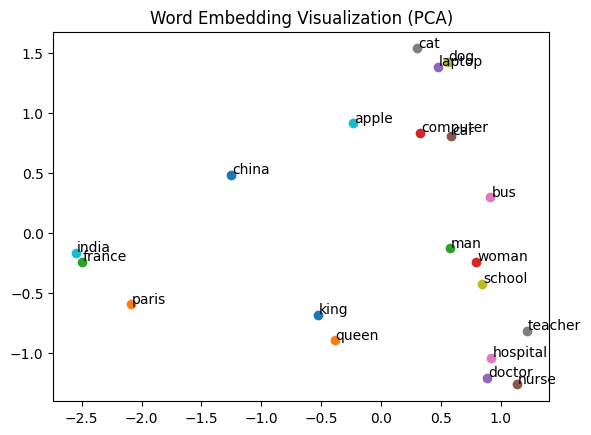

In [7]:
words = ["king", "queen", "man", "woman",
         "doctor", "nurse", "hospital", "teacher",
         "school", "india", "china", "paris",
         "france", "computer", "laptop", "car",
         "bus", "cat", "dog", "apple"]

vectors = [model[word] for word in words]

# Reduce 300D → 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure()
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word)

plt.title("Word Embedding Visualization (PCA)")
plt.show()
